**Name:- Pranjal Godse - Batch:- 6**

# Problem 1:- Image Classification Project - MNIST
This notebook trains Logistic Regression and CNN models and compares their performance.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


## Load and Preprocess Dataset

In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


## Logistic Regression Model

In [3]:

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_train)

lr_preds = lr_model.predict(X_test_flat)
lr_accuracy = accuracy_score(y_test, lr_preds)

print("Logistic Regression Accuracy:", lr_accuracy)


Logistic Regression Accuracy: 0.9259


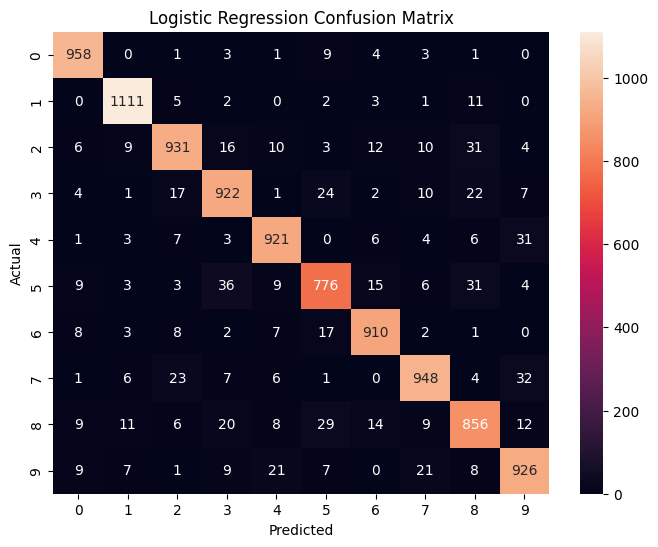

In [4]:

cm_lr = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## CNN Model

In [5]:

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(X_train_cnn, y_train,
                        epochs=5,
                        validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.8823 - loss: 0.3754 - val_accuracy: 0.9770 - val_loss: 0.0780
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 30ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9856 - val_loss: 0.0457
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9873 - loss: 0.0382 - val_accuracy: 0.9873 - val_loss: 0.0445
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9910 - loss: 0.0267 - val_accuracy: 0.9883 - val_loss: 0.0418
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 0.9891 - val_loss: 0.0419


In [6]:

test_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9887 - loss: 0.0367
CNN Accuracy: 0.991100013256073


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


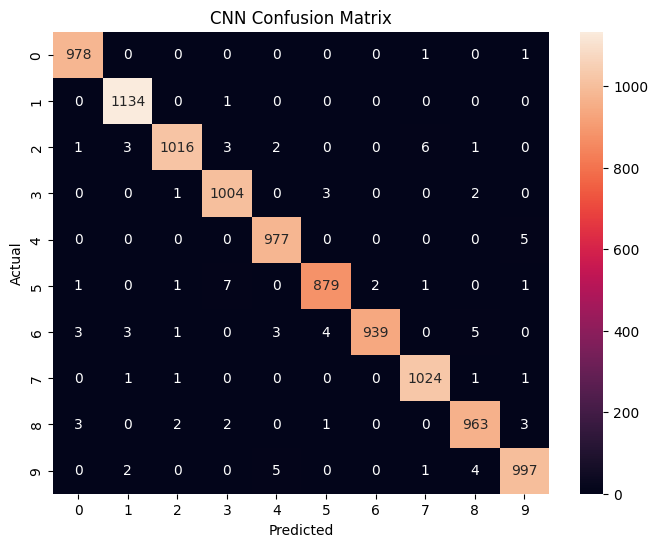

In [7]:

cnn_preds = cnn_model.predict(X_test_cnn)
cnn_preds_classes = np.argmax(cnn_preds, axis=1)

cm_cnn = confusion_matrix(y_test, cnn_preds_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm_cnn, annot=True, fmt='d')
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


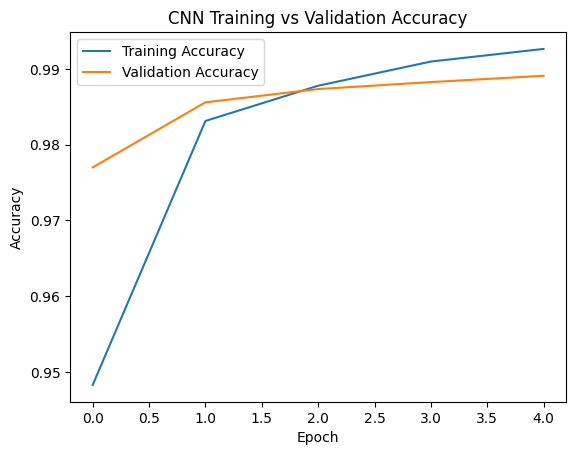

In [8]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [9]:

print("Model Comparison:")
print("Logistic Regression Accuracy:", lr_accuracy)
print("CNN Accuracy:", cnn_accuracy)


Model Comparison:
Logistic Regression Accuracy: 0.9259
CNN Accuracy: 0.991100013256073
